# Code for post about cooperation around ML

Emilio Lehoucq<br>
5/15/23

## Loading libraries and helper function

In [1]:
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The following cells 1) clone [this GitHub repository](https://github.com/emiliolehoucq/linkedin_posts) into the [current working directory](https://data-flair.training/blogs/python-directory/#:~:text=To%20find%20out%20which%20directory,use%20the%20getcwd()%20method.&text=Cwd%20is%20for%20current%20working,use%20the%20method%20getcwdb().), 2) load a helper function into the notebook, and 3) remove the directory with the clone of the GitHub repository.

The helper function can be saved to the notebook.

The cell that loads the helper function into the current notebook doesn't run the code automatically. After loading the helper function, you need to run the cell.

To read more about how to clone a GitHub repository and how to remove a directory, see:
- https://stackoverflow.com/questions/52741983/import-a-github-into-jupyter-notebook-directly
- https://stackoverflow.com/questions/43756284/how-to-remove-a-directory-including-all-its-files-in-python

In [2]:
%%bash
git clone https://github.com/emiliolehoucq/linkedin_posts

Cloning into 'linkedin_posts'...


In [3]:
# %load linkedin_posts/code/helper_functions/my_plt_style.py
# I've only used this function with limited data and haven't tested it --Emilio Lehoucq 3/6/2023

def my_plt_style(ax, title, xgrid = False, ygrid = False, grid = False):
    """
    Function to style plot.
    
    Input:
        ax (Axes). Axes of plot.
        title (string). Title of plot. 
        xgrid (Boolean). Optional parameter to add x grid to plot. Default is false.
        ygrid (Boolean). Optional parameter to add y grid to plot. Default is false.
        grid (Boolean). Optional parameter to add both x grid and y grid to plot. Default is false.
    Output:
        None.

    Dependencies:
        The function doesn't automatically load any library, but it's designed to work with matplotlib (as plt).    
    """
    # Bold title:
    plt.title(title, fontweight = 'bold')
    
    # Remove frame around plot:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Add grid:
    if xgrid:
        ax.xaxis.grid(linestyle = '--', color = 'lightgrey')
    elif ygrid:
        ax.yaxis.grid(linestyle = '--', color = 'lightgrey')
    elif grid:
        ax.grid(linestyle = '--', color = 'lightgrey')

In [4]:
shutil.rmtree("linkedin_posts")

## Defining helper function

This helper function is only to avoid repetition and increase reproducibility *in this script*.

In [5]:
def create_new_var(df, list_of_lists, var_name):
    '''
    Helper function to create new variable in dataframe. See usage below.
    '''
    INDEX_TEXT = 0
    INDEX_NAME = 1
    for each_list in list_of_lists:
        # Create new column
        # If row contains given text, assign name to new column
        # Else, assign np.nan
        df[each_list[INDEX_NAME]] = np.where(
            df[var_name].str.contains(each_list[INDEX_TEXT], na = False),
            each_list[INDEX_NAME],
            np.nan
        )

## Defining paths

In [6]:
data_path = '../../data/'
plots_path = '../../plots/published/'

## Reading data

In [7]:
years = range(2017, 2023)
# Stack Overflow has data going back to 2011
INDEX_2017 = 0

# Reading files one by one rather than iterating because they have different characteristics
# encoding='latin-1' https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte
# low_memory = False https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# skiprows = [1] https://stackoverflow.com/questions/51949545/skip-second-row-of-dataframe-while-reading-csv-file-in-python
kaggle_2017 = pd.read_csv(data_path + 'kaggle_' + str(years[INDEX_2017]) + '_data.csv', encoding = 'latin-1', low_memory = False)
kaggle_2018 = pd.read_csv(data_path + 'kaggle_' + str(years[INDEX_2017 + 1]) + '_data.csv', low_memory = False, skiprows = [1])
kaggle_2019 = pd.read_csv(data_path + 'kaggle_' + str(years[INDEX_2017 + 2]) + '_data.csv', low_memory = False, skiprows = [1])
kaggle_2020 = pd.read_csv(data_path + 'kaggle_' + str(years[INDEX_2017 + 3]) + '_data.csv', low_memory = False, skiprows = [1])
kaggle_2021 = pd.read_csv(data_path + 'kaggle_' + str(years[INDEX_2017 + 4]) + '_data.csv', low_memory = False, skiprows = [1])
kaggle_2022 = pd.read_csv(data_path + 'kaggle_' + str(years[INDEX_2017 + 5]) + '_data.csv', low_memory = False, skiprows = [1])
so_2017 = pd.read_csv(data_path + 'stack_overflow_' + str(years[INDEX_2017]) + '_data.csv')
so_2018 = pd.read_csv(data_path + 'stack_overflow_' + str(years[INDEX_2017 + 1]) + '_data.csv', low_memory = False)
so_2019 = pd.read_csv(data_path + 'stack_overflow_' + str(years[INDEX_2017 + 2]) + '_data.csv')
so_2020 = pd.read_csv(data_path + 'stack_overflow_' + str(years[INDEX_2017 + 3]) + '_data.csv')
so_2021 = pd.read_csv(data_path + 'stack_overflow_' + str(years[INDEX_2017 + 4]) + '_data.csv')
so_2022 = pd.read_csv(data_path + 'stack_overflow_' + str(years[INDEX_2017 + 5]) + '_data.csv', low_memory = False)

# Checking that the data looks the way I expected
assert kaggle_2017.shape[0] == 16716
assert kaggle_2017.shape[1] == 228
assert kaggle_2018.shape[0] == 23859
assert kaggle_2018.shape[1] == 395
assert kaggle_2019.shape[0] == 19717
assert kaggle_2019.shape[1] == 246
assert kaggle_2020.shape[0] == 20036
assert kaggle_2020.shape[1] == 355
assert kaggle_2021.shape[0] == 25973
assert kaggle_2021.shape[1] == 369
assert kaggle_2022.shape[0] == 23997
assert kaggle_2022.shape[1] == 296
assert so_2017.shape[0] == 51392
assert so_2017.shape[1] == 154
assert so_2018.shape[0] == 98855
assert so_2018.shape[1] == 129
assert so_2019.shape[0] == 88883
assert so_2019.shape[1] == 85
assert so_2020.shape[0] == 64461
assert so_2020.shape[1] == 61
assert so_2021.shape[0] == 83439
assert so_2021.shape[1] == 48
assert so_2022.shape[0] == 73268
assert so_2022.shape[1] == 79

## Filtering sample and selecting and cleaning columns of interest

The sample of interest are people such as data scientists or machine learning engineers who professionally write code for machine learning in the United States.

In [8]:
# kaggle_2017

kaggle_2017 = kaggle_2017[ # MISSING EMPLOYER USE OF ML AS A FILTER
    # COUNTRY
    (kaggle_2017['Country'] == 'United States')
    # WRITES CODE
    # How long have you been writing code to analyze data?
    & (kaggle_2017['Tenure'] != "I don't write code to analyze data")
    # JOB TITLE
    # Select the option that's most similar to your current job/professional title (or most recent title if retired). - Selected Choice
    # They didn't have data scientist as current title
    & (kaggle_2017['CurrentJobTitleSelect'].isin([
        'Predictive Modeler',
        'Data Analyst',
        'Data Miner',
        'Statistician',
        'Machine Learning Engineer'
    ]))
    # In this survey, they had the following question: Do you currently consider yourself a data scientist? - Selected Choice
    # I'd prefer that over job title, but they didn't ask it since 2019
    # EMPLOYMENT STATUS
    # What's your current employment status?
    & (kaggle_2017['EmploymentStatus'].isin([
        'Independent contractor, freelancer, or self-employed',
        'Employed full-time',
        'Employed part-time'
    ]))
    # YEARS USING ML
    # In which areas of machine learning do you consider yourself competent? (Select all that apply) - Selected Choice
    # I assume nan means they are not competent, which I take as a proxy that they have not used ML methods
    & (kaggle_2017['MLSkillsSelect'].notnull())
]

# kaggle_2018

kaggle_2018 = kaggle_2018[
    # COUNTRY
    (kaggle_2018['Q3'] == 'United States of America')
    # WRITES CODE
    # How long have you been writing code to analyze data?
    & (~kaggle_2018['Q24'].isin([
        'I have never written code and I do not want to learn',
        'I have never written code but I want to learn'
    ]))
    # JOB TITLE & EMPLOYMENT STATUS
    # Select the title most similar to your current role (or most recent title if retired): - Selected Choice
    # Filters for employment status because one of the answer options was 'Not employed'
    & (kaggle_2018['Q6'] == 'Data Scientist')
    # In this survey, they also had the following question:
    # Do you currently consider yourself a data scientist? - Selected Choice
    # EMPLOYER USE OF ML
    # Does your current employer incorporate machine learning methods into their business?
    & (kaggle_2018['Q10'].isin([
        'We are exploring ML methods (and may one day put a model into production)',
        'We recently started using ML methods (i.e., models in production for less than 2 years)',
        'We have well established ML methods (i.e., models in production for more than 2 years)',
        'We use ML methods for generating insights (but do not put working models into production)'
    ])) 
    # YEARS USING ML
    # For how many years have you used machine learning methods?
    & (~kaggle_2018['Q25'].isin([
        'I have never studied machine learning but plan to learn in the future',
        'I have never studied machine learning and I do not plan to'
    ]))
]

# kaggle_2019

kaggle_2019 = kaggle_2019[
    # COUNTRY
    (kaggle_2019['Q3'] == 'United States of America')
    # WRITES CODE 
    # How long have you been writing code to analyze data (at work or at school)?
    & (kaggle_2019['Q15'] != 'I have never written code')
    # JOB TITLE & EMPLOYMENT STATUS
    # Select the title most similar to your current role (or most recent title if retired): - Selected Choice
    # Filters for employment status because one of the answer options was 'Not employed'
    & (kaggle_2019['Q5'] == 'Data Scientist')
    # EMPLOYER USE OF ML
    # Select the title most similar to your current role (or most recent title if retired): - Selected Choice
    & (~kaggle_2019['Q5'].isin([
        'I do not know',
        'No (we do not use ML methods)'
    ]))
    # YEARS USING ML
    # For how many years have you used machine learning methods?
    # There was not a "never" option, so I assume nan is never
    & (kaggle_2019['Q23'].notnull())    
]

# kaggle_2020

kaggle_2020 = kaggle_2020[
    # COUNTRY
    (kaggle_2020['Q3'] == 'United States of America')
    # WRITES CODE
    # For how many years have you been writing code and/or programming?
    & (kaggle_2020['Q6'] != 'I have never written code')
    # JOB TITLE & EMPLOYMENT STATUS
    # Select the title most similar to your current role (or most recent title if retired)
    # Filters for employment status because one of the answer options was 'Currently not employed'
    & (kaggle_2020['Q5'].isin([
        'Data Scientist',
        'Machine Learning Engineer'
    ]))
    # EMPLOYER USE OF ML
    # Does your current employer incorporate machine learning methods into their business?
    & (~kaggle_2020['Q22'].isin([
        'I do not know',
        'No (we do not use ML methods)'
    ]))  
    # YEARS USING ML
    # For how many years have you used machine learning methods?
    & (kaggle_2020['Q15'] != 'I do not use machine learning methods')  
]

# kaggle_2021

kaggle_2021 = kaggle_2021[
    # COUNTRY
    (kaggle_2021['Q3'] == 'United States of America')
    # WRITES CODE
    # For how many years have you been writing code and/or programming?
    & (kaggle_2021['Q6'] != 'I have never written code')
    # JOB TITLE & EMPLOYMENT STATUS
    # Select the title most similar to your current role (or most recent title if retired)
    # Filters for employment status because one of the answer options was 'Currently not employed'
    & (kaggle_2021['Q5'].isin([
        'Data Scientist',
        'Machine Learning Engineer'
    ]))
    # EMPLOYER USE OF ML
    # Does your current employer incorporate machine learning methods into their business?
    & (~kaggle_2021['Q23'].isin([
        'I do not know',
        'No (we do not use ML methods)'
    ]))
    # YEARS USING ML
    # For how many years have you used machine learning methods?
    & (kaggle_2021['Q15'] != 'I do not use machine learning methods')  
]

# kaggle_2022

kaggle_2022 = kaggle_2022[
    # COUNTRY
    (kaggle_2022['Q4'] == 'United States of America')
    # WRITES CODE
    & (kaggle_2022['Q11'] != 'I have never written code')
    # JOB TITLE & EMPLOYMENT STATUS
    # Select the title most similar to your current role (or most recent title if retired)
    # Filters for employment status because one of the answer options was 'Currently not employed'
    & (kaggle_2022['Q23'].isin([
        'Data Scientist',
        'Machine Learning/MLops Engineer'
    ]))
    # EMPLOYER USE OF ML
    # Does your current employer incorporate machine learning methods into their business?
    & (~kaggle_2022['Q27'].isin([
        'I do not know',
        'No (we do not use ML methods)'
    ])) 
    # YEARS USING ML
    # For how many years have you used machine learning methods?
    & (kaggle_2022['Q16'] != 'I do not use machine learning methods') 
]

# so_2017

so_2017 = so_2017[
    # COUNTRY
    (so_2017['Country'] == 'United States')
    # WRITES CODE PROFESSIONALLY
    # For how many years have you coded as part of your job?
    # I assume nan means none
    & (so_2017['YearsCodedJob'].notnull())
    # JOB TITLE
    # Which of the following best describe you?
    # https://www.statology.org/cannot-mask-with-non-boolean-array-containing-na-nan-values/
    & (so_2017['DeveloperType'].str.contains("Machine learning specialist|Data scientist", na = False))
    # EMPLOYMENT STATUS
    # Which of the following best describes your current employment status?
    & (so_2017['EmploymentStatus'].isin([
    'Employed part-time',
    'Employed full-time',
    'Independent contractor, freelancer, or self-employed'
    ]))
]

# so_2018

so_2018 = so_2018[
    # COUNTRY
    (so_2018['Country'] == 'United States') 
    # WRITES CODE PROFESSIONALLY
    # For how many years have you coded professionally (as a part of your work)?
    & (so_2018['YearsCodingProf'].notnull())
    # JOB TITLE
    # Which of the following describe you? Please select all that apply.
    & (so_2018['DevType'].str.contains("Data scientist or machine learning specialist", na = False))    
    # EMPLOYMENT STATUS
    # Which of the following best describes your current employment status?
    & (so_2018['Employment'].isin([
    'Employed part-time',
    'Employed full-time',
    'Independent contractor, freelancer, or self-employed'
    ]))
]

# so_2019

so_2019 = so_2019[
    # COUNTRY
    (so_2019['Country'] == 'United States') 
    # WRITES CODE PROFESSIONALLY
    # How many years have you coded professionally (as a part of your work)?
    & (so_2019['YearsCodePro'].notnull())
    # JOB TITLE
    # Which of the following describe you? Please select all that apply.
    & (so_2019['DevType'].str.contains("Data scientist or machine learning specialist", na = False))    
    # EMPLOYMENT STATUS
    # Which of the following best describes your current employment status?
    & (so_2019['Employment'].isin([
    'Employed part-time',
    'Employed full-time',
    'Independent contractor, freelancer, or self-employed'
    ]))
]

# so_2020

so_2020 = so_2020[
    # COUNTRY
    (so_2020['Country'] == 'United States') 
    # WRITES CODE PROFESSIONALLY
    # How many years have you coded professionally (as a part of your work)?
    & (so_2020['YearsCodePro'].notnull())
    # JOB TITLE
    # Which of the following describe you? Please select all that apply.
    & (so_2020['DevType'].str.contains("Data scientist or machine learning specialist", na = False))    
    # EMPLOYMENT STATUS
    # Which of the following best describes your current employment status?
    & (so_2020['Employment'].isin([
    'Employed part-time',
    'Employed full-time',
    'Independent contractor, freelancer, or self-employed'
    ]))
]

# so_2021

so_2021 = so_2021[
    # COUNTRY
    (so_2021['Country'] == 'United States of America') 
    # WRITES CODE PROFESSIONALLY
    # NOT including education, how many years have you coded professionally (as a part of your work)?
    & (so_2021['YearsCodePro'].notnull())
    # JOB TITLE
    # Which of the following describe you? Please select all that apply.
    & (so_2021['DevType'].str.contains("Data scientist or machine learning specialist", na = False))    
    # EMPLOYMENT STATUS
    # Which of the following best describes your current <b>employment status</b>?
    & (so_2021['Employment'].isin([
    'Employed part-time',
    'Employed full-time',
    'Independent contractor, freelancer, or self-employed'
    ]))
]

# so_2022

so_2022 = so_2022[
    # COUNTRY
    (so_2022['Country'] == 'United States of America') 
    # WRITES CODE PROFESSIONALLY
    # NOT including education, how many years have you coded professionally (as a part of your work)?
    & (so_2022['YearsCodePro'].notnull())
    # JOB TITLE
    # Which of the following describe you? Please select all that apply.
    & (so_2022['DevType'].str.contains("Data scientist or machine learning specialist", na = False))    
    # EMPLOYMENT STATUS
    # Which of the following best describes your current employment status?
    & (so_2022['Employment'].str.contains("Employed, full-time|Independent contractor, freelancer, or self-employed|Employed, part-time", na = False))
]

print('Sample sizes after filtering:\n')
print('Number of rows kaggle_2017', ': ', kaggle_2017.shape[0])
print('Number of rows kaggle_2018', ': ', kaggle_2018.shape[0])
print('Number of rows kaggle_2019', ': ', kaggle_2019.shape[0])
print('Number of rows kaggle_2020', ': ', kaggle_2020.shape[0])
print('Number of rows kaggle_2021', ': ', kaggle_2021.shape[0])
print('Number of rows kaggle_2022', ': ', kaggle_2022.shape[0], '\n')
print('Number of rows so_2017', ': ', so_2017.shape[0])
print('Number of rows so_2018', ': ', so_2018.shape[0])
print('Number of rows so_2019', ': ', so_2019.shape[0])
print('Number of rows so_2020', ': ', so_2020.shape[0])
print('Number of rows so_2021', ': ', so_2021.shape[0])
print('Number of rows so_2022', ': ', so_2022.shape[0])

# Selecting columns of interest:
# When more efficient, I copied the survey schema and asked ChatGPT to format it

# kaggle_2017

kaggle_2017_cols = {
    'WorkProductionFrequency': 'At work, how often do the models you build get put into production?',
    'WorkToolsFrequencyAmazonML': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Amazon Machine Learning',
    'WorkToolsFrequencyAWS': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Amazon Web services',
    'WorkToolsFrequencyAngoss': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Angoss',
    'WorkToolsFrequencyC': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - C/C++',
    'WorkToolsFrequencyCloudera': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Cloudera',
    'WorkToolsFrequencyDataRobot': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - DataRobot',
    'WorkToolsFrequencyFlume': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Flume',
    'WorkToolsFrequencyGCP': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Google Cloud Compute',
    'WorkToolsFrequencyHadoop': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Hadoop/Hive/Pig',
    'WorkToolsFrequencyIBMCognos': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - IBM Cognos',
    'WorkToolsFrequencyIBMSPSSModeler': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - IBM SPSS Modeler',
    'WorkToolsFrequencyIBMSPSSStatistics': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - IBM SPSS Statistics',
    'WorkToolsFrequencyIBMWatson': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - IBM Watson / Waton Analytics',
    'WorkToolsFrequencyImpala': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Impala',
    'WorkToolsFrequencyJava': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Java',
    'WorkToolsFrequencyJulia': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Julia',
    'WorkToolsFrequencyJupyter': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Jupyter notebooks',
    'WorkToolsFrequencyKNIMECommercial': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - KNIME (commercial version)',
    'WorkToolsFrequencyKNIMEFree': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - KNIME (free version)',
    'WorkToolsFrequencyMathematica': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Mathematica',
    'WorkToolsFrequencyMATLAB': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - MATLAB/Octave',
    'WorkToolsFrequencyAzure': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Microsoft Azure Machine Learning',
    'WorkToolsFrequencyExcel': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Microsoft Excel Data Mining',
    'WorkToolsFrequencyMicrosoftRServer': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Microsoft R Server (Formerly Revolution Analytics)',
    'WorkToolsFrequencyMicrosoftSQL': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Microsoft SQL Server Data Mining',
    'WorkToolsFrequencyMinitab': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Minitab',
    'WorkToolsFrequencyNoSQL': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - NoSQL',
    'WorkToolsFrequencyOracle': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Oracle Data Mining/ Oracle R Enterprise',
    'WorkToolsFrequencyOrange': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Orange',
    'WorkToolsFrequencyPerl': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Perl',
    'WorkToolsFrequencyPython': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Python',
    'WorkToolsFrequencyQlik': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - QlikView',
    'WorkToolsFrequencyR': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - R',
    'WorkToolsFrequencyRapidMinerCommercial': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - RapidMiner (commercial version)',
    'WorkToolsFrequencyRapidMinerFree': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - RapidMiner (free version)',
    'WorkToolsFrequencySalfrod': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Salfrod Systems CART, MARS, TreeNet, RF, SPM',
    'WorkToolsFrequencySAPBusinessObjects': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - SAP BusinessObjects Predictive Analytics',
    'WorkToolsFrequencySASBase': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - SAS Base',
    'WorkToolsFrequencySASEnterprise': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - SAS Enterprise Miner',
    'WorkToolsFrequencySASJMP': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - SAS JMP',
    'WorkToolsFrequencySpark': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Spark / MLlib',
    'WorkToolsFrequencySQL': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - SQL',
    'WorkToolsFrequencyStan': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Stan',
    'WorkToolsFrequencyStatistica': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Statistica (Quest/Dell, formerly Statsoft)',
    'WorkToolsFrequencyTableau': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Tableau',
    'WorkToolsFrequencyTensorFlow': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - TensorFlow',
    'WorkToolsFrequencyTIBCO': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - TIBCO Spotfire',
    'WorkToolsFrequencyUnix': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Unix shell / awk',
    'WorkToolsFrequencySelect1': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Other1',
    'WorkToolsFrequencySelect2': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Other2',
    'WorkFrequencySelect3': 'At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Other3',
    'TimeGatheringData': 'At work, on average, what percentage of your time is devoted to: (Total must equal 100%) - Gathering and cleaning data',
    'TimeModelBuilding': 'At work, on average, what percentage of your time is devoted to: (Total must equal 100%) - Model building/model selection',
    'TimeProduction': 'At work, on average, what percentage of your time is devoted to: (Total must equal 100%) - Putting your work into production',
    'TimeVisualizing': 'At work, on average, what percentage of your time is devoted to: (Total must equal 100%) - Visualizing data',
    'TimeFindingInsights': 'At work, on average, what percentage of your time is devoted to: (Total must equal 100%) - Finding insights in the data and communicating these to relevant stakeholders',
    'AlgorithmUnderstandingLevel': 'At which level do you understand the mathematics behind the algorithms you use at work?',
    'WorkChallengeFrequencyPolitics': 'At work, how often did you experience these barriers or challenges within the past year? - Company politics / Lack of management/financial support for a data science team',
    'WorkChallengeFrequencyUnusedResults': 'At work, how often did you experience these barriers or challenges within the past year? - Data Science results not used by business decision makers',
    'WorkChallengeFrequencyUnusefulInstrumenting': 'At work, how often did you experience these barriers or challenges within the past year? - Did not instrument data useful for scientific analysis and decision-making',
    'WorkChallengeFrequencyDeployment': 'At work, how often did you experience these barriers or challenges within the past year? - Difficulties in deployment/scoring',
    'WorkChallengeFrequencyDirtyData': 'At work, how often did you experience these barriers or challenges within the past year? - Dirty data',
    'WorkChallengeFrequencyExplaining': 'At work, how often did you experience these barriers or challenges within the past year? - Explaining data science to others',
    'WorkChallengeFrequencyPass': 'At work, how often did you experience these barriers or challenges within the past year? - I prefer not to say',
    'WorkChallengeFrequencyIntegration': "At work, how often did you experience these barriers or challenges within the past year? - Inability to integrate findings into organization's decision-making process",
    'WorkChallengeFrequencyTalent': 'At work, how often did you experience these barriers or challenges within the past year? - Lack of data science talent in the organization',
    'WorkChallengeFrequencyDataFunds': 'At work, how often did you experience these barriers or challenges within the past year? - Lack of funds to buy useful datasets from external sources',
    'WorkChallengeFrequencyDomainExpertise': 'At work, how often did you experience these barriers or challenges within the past year? - Lack of significant domain expert input',
    'WorkChallengeFrequencyML': 'At work, how often did you experience these barriers or challenges within the past year? - Limitations in the state of the art in machine learning',
    'WorkChallengeFrequencyTools': 'At work, how often did you experience these barriers or challenges within the past year? - Limitations of tools',
    'WorkChallengeFrequencyExpectations': 'At work, how often did you experience these barriers or challenges within the past year? - Maintaining responsible expectations about the potential impact of data science projects',
    'WorkChallengeFrequencyITCoordination': 'At work, how often did you experience these barriers or challenges within the past year? - Need to coordinate with IT',
    'WorkChallengeFrequencyHiringFunds': 'At work, how often did you experience these barriers or challenges within the past year? - Organization is small and cannot afford a data science team',
    'WorkChallengeFrequencyPrivacy': 'At work, how often did you experience these barriers or challenges within the past year? - Privacy issues',
    'WorkChallengeFrequencyScaling': 'At work, how often did you experience these barriers or challenges within the past year? - Scaling data science solution up to full database',
    'WorkChallengeFrequencyEnvironments': 'At work, how often did you experience these barriers or challenges within the past year? - Team using multiple ad-hoc development environments such as Python, R, Java, etc.',
    'WorkChallengeFrequencyClarity': 'At work, how often did you experience these barriers or challenges within the past year? - The lack of a clear question to be answering, or a clear direction to go in, with the available data',
    'WorkChallengeFrequencyDataAccess': 'At work, how often did you experience these barriers or challenges within the past year? - Unavailability of/difficult access to data',
    'WorkChallengeFrequencyOtherSelect': 'At work, how often did you experience these barriers or challenges within the past year? - Other'
}

# kaggle_2018

kaggle_2018_cols = {
    'Q16_Part_1': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_2': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_3': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_4': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_5': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_6': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_7': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_8': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_9': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_10': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_11': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_12': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_13': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_14': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_15': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_16': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_17': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q16_Part_18': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q17': 'What specific programming language do you use most often? - Selected Choice',
    'Q19_Part_1': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_2': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_3': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_4': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_5': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_6': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_7': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_8': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_9': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_10': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_11': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_12': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_13': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_14': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_15': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_16': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_17': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_18': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q19_Part_19': 'What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice',
    'Q20': 'Of the choices that you selected in the previous question, which ML library have you used the most? - Selected Choice',
    'Q30_Part_1': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_2': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_3': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_4': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_5': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_6': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_7': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_8': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_9': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_10': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_11': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_12': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_13': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_14': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_15': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_16': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_17': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_18': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_19': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_20': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_21': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_22': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_23': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_24': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q30_Part_25': 'Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice',
    'Q42_Part_1': 'What metrics do you or your organization use to determine whether or not your models were successful? (Select all that apply) - Selected Choice',
    'Q42_Part_2': 'What metrics do you or your organization use to determine whether or not your models were successful? (Select all that apply) - Selected Choice',
    'Q42_Part_3': 'What metrics do you or your organization use to determine whether or not your models were successful? (Select all that apply) - Selected Choice',
    'Q42_Part_4': 'What metrics do you or your organization use to determine whether or not your models were successful? (Select all that apply) - Selected Choice',
    'Q42_Part_5': 'What metrics do you or your organization use to determine whether or not your models were successful? (Select all that apply) - Selected Choice',
    'Q45_Part_1': "In what circumstances would you explore model insights and interpret your model's predictions? (Select all that apply)",
    'Q45_Part_2': "In what circumstances would you explore model insights and interpret your model's predictions? (Select all that apply)",
    'Q45_Part_3': "In what circumstances would you explore model insights and interpret your model's predictions? (Select all that apply)",
    'Q45_Part_4': "In what circumstances would you explore model insights and interpret your model's predictions? (Select all that apply)",
    'Q45_Part_5': "In what circumstances would you explore model insights and interpret your model's predictions? (Select all that apply)",
    'Q45_Part_6': "In what circumstances would you explore model insights and interpret your model's predictions? (Select all that apply)"
}

# kaggle_2019

kaggle_2019_cols = {
    'Q18_Part_1': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q18_Part_2': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q18_Part_3': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q18_Part_4': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q18_Part_5': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q18_Part_6': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q18_Part_7': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q18_Part_8': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q18_Part_9': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q18_Part_10': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q18_Part_11': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q18_Part_12': 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q28_Part_1': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q28_Part_2': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q28_Part_3': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q28_Part_4': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q28_Part_5': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q28_Part_6': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q28_Part_7': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q28_Part_8': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q28_Part_9': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q28_Part_10': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q28_Part_11': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q28_Part_12': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q32_Part_1': 'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q32_Part_2': 'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q32_Part_3': 'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q32_Part_4': 'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q32_Part_5': 'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q32_Part_6': 'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q32_Part_7': 'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q32_Part_8': 'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q32_Part_9': 'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q32_Part_10': 'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q32_Part_11': 'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q32_Part_12': 'Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice',
    'Q33_Part_1': 'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice',
    'Q33_Part_2': 'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice',
    'Q33_Part_3': 'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice',
    'Q33_Part_4': 'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice',
    'Q33_Part_5': 'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice',
    'Q33_Part_6': 'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice',
    'Q33_Part_7': 'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice',
    'Q33_Part_8': 'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice',
    'Q33_Part_9': 'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice',
    'Q33_Part_10': 'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice',
    'Q33_Part_11': 'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice',
    'Q33_Part_12': 'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice'
}

# kaggle_2020

kaggle_2020_cols = {
    'Q7_Part_1': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_2': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_3': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_4': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_5': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_6': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_7': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_8': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_9': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_10': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_11': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_12': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q16_Part_1': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_2': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_3': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_4': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_5': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_6': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_7': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_8': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_9': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_10': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_11': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_12': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_13': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_14': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_15': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q34_A_Part_1': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q34_A_Part_2': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q34_A_Part_3': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q34_A_Part_4': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q34_A_Part_5': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q34_A_Part_6': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q34_A_Part_7': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q34_A_Part_8': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q34_A_Part_9': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q34_A_Part_10': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q34_A_Part_11': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q35_A_Part_1': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q35_A_Part_2': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q35_A_Part_3': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q35_A_Part_4': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q35_A_Part_5': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q35_A_Part_6': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q35_A_Part_7': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q35_A_Part_8': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q35_A_Part_9': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q35_A_Part_10': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q36_Part_1': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
    'Q36_Part_2': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
    'Q36_Part_3': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
    'Q36_Part_4': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
    'Q36_Part_5': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
    'Q36_Part_6': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
    'Q36_Part_7': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
    'Q36_Part_8': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
    'Q36_Part_9': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)'
    
}

# kaggle_2021

kaggle_2021_cols = {
    'Q7_Part_1': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_2': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_3': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_4': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_5': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_6': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_7': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_8': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_9': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_10': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_11': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q7_Part_12': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q16_Part_1': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_2': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_3': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_4': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_5': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_6': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_7': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_8': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_9': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_10': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_11': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_12': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_13': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_14': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_15': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_16': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q16_Part_17': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q37_A_Part_1': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q37_A_Part_2': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q37_A_Part_3': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q37_A_Part_4': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q37_A_Part_5': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q37_A_Part_6': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q37_A_Part_7': 'Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)',
    'Q38_A_Part_1': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q38_A_Part_2': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q38_A_Part_3': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q38_A_Part_4': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q38_A_Part_5': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q38_A_Part_6': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q38_A_Part_7': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q38_A_Part_8': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q38_A_Part_9': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q38_A_Part_10': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q38_A_Part_11': 'Do you use any tools to help manage machine learning experiments? (Select all that apply)',
    'Q39_Part_1': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
    'Q39_Part_2': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
    'Q39_Part_3': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
    'Q39_Part_4': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
    'Q39_Part_5': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
    'Q39_Part_6': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
    'Q39_Part_7': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
    'Q39_Part_8': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)',
    'Q39_Part_9': 'Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)'    
}

# kaggle_2022

kaggle_2022_cols = {
    'Q12_1': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q12_2': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q12_3': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q12_4': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q12_5': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q12_6': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q12_7': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q12_8': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q12_9': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q12_10': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q12_11': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q12_12': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q12_13': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q12_14': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q12_15': 'What programming languages do you use on a regular basis? (Select all that apply)',
    'Q17_1': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q17_2': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q17_3': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q17_4': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q17_5': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q17_6': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q17_7': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q17_8': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q17_9': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q17_10': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q17_11': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q17_12': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q17_13': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q17_14': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q17_15': 'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)',
    'Q21_1': 'Do you download pre-trained model weights from any of the following services? (Select all that apply)',
    'Q21_2': 'Do you download pre-trained model weights from any of the following services? (Select all that apply)',
    'Q21_3': 'Do you download pre-trained model weights from any of the following services? (Select all that apply)',
    'Q21_4': 'Do you download pre-trained model weights from any of the following services? (Select all that apply)',
    'Q21_5': 'Do you download pre-trained model weights from any of the following services? (Select all that apply)',
    'Q21_6': 'Do you download pre-trained model weights from any of the following services? (Select all that apply)',
    'Q21_7': 'Do you download pre-trained model weights from any of the following services? (Select all that apply)',
    'Q21_8': 'Do you download pre-trained model weights from any of the following services? (Select all that apply)',
    'Q21_9': 'Do you download pre-trained model weights from any of the following services? (Select all that apply)',
    'Q21_10': 'Do you download pre-trained model weights from any of the following services? (Select all that apply)',
    'Q22': 'Which of the following ML model hubs/repositories do you use most often? (Select all that apply)',
    'Q37_1': 'Do you use any of the following managed machine learning products? (Select all that apply)',
    'Q37_2': 'Do you use any of the following managed machine learning products? (Select all that apply)',
    'Q37_3': 'Do you use any of the following managed machine learning products? (Select all that apply)',
    'Q37_4': 'Do you use any of the following managed machine learning products? (Select all that apply)',
    'Q37_5': 'Do you use any of the following managed machine learning products? (Select all that apply)',
    'Q37_6': 'Do you use any of the following managed machine learning products? (Select all that apply)',
    'Q37_7': 'Do you use any of the following managed machine learning products? (Select all that apply)',
    'Q37_8': 'Do you use any of the following managed machine learning products? (Select all that apply)',
    'Q37_9': 'Do you use any of the following managed machine learning products? (Select all that apply)',
    'Q37_10': 'Do you use any of the following managed machine learning products? (Select all that apply)',
    'Q37_11': 'Do you use any of the following managed machine learning products? (Select all that apply)',
    'Q37_12': 'Do you use any of the following managed machine learning products? (Select all that apply)',
    'Q37_13': 'Do you use any of the following managed machine learning products? (Select all that apply)',
    'Q38_1': 'Do you use any of the following automated machine learning tools? (Select all that apply)',
    'Q38_2': 'Do you use any of the following automated machine learning tools? (Select all that apply)',
    'Q38_3': 'Do you use any of the following automated machine learning tools? (Select all that apply)',
    'Q38_4': 'Do you use any of the following automated machine learning tools? (Select all that apply)',
    'Q38_5': 'Do you use any of the following automated machine learning tools? (Select all that apply)',
    'Q38_6': 'Do you use any of the following automated machine learning tools? (Select all that apply)',
    'Q38_7': 'Do you use any of the following automated machine learning tools? (Select all that apply)',
    'Q38_8': 'Do you use any of the following automated machine learning tools? (Select all that apply)',
    'Q40_1': 'Do you use any tools to help monitor your machine learning models and/or experiments? (Select all that apply)',
    'Q40_2': 'Do you use any tools to help monitor your machine learning models and/or experiments? (Select all that apply)',
    'Q40_3': 'Do you use any tools to help monitor your machine learning models and/or experiments? (Select all that apply)',
    'Q40_4': 'Do you use any tools to help monitor your machine learning models and/or experiments? (Select all that apply)',
    'Q40_5': 'Do you use any tools to help monitor your machine learning models and/or experiments? (Select all that apply)',
    'Q40_6': 'Do you use any tools to help monitor your machine learning models and/or experiments? (Select all that apply)',
    'Q40_7': 'Do you use any tools to help monitor your machine learning models and/or experiments? (Select all that apply)',
    'Q40_8': 'Do you use any tools to help monitor your machine learning models and/or experiments? (Select all that apply)',
    'Q40_9': 'Do you use any tools to help monitor your machine learning models and/or experiments? (Select all that apply)',
    'Q40_10': 'Do you use any tools to help monitor your machine learning models and/or experiments? (Select all that apply)',
    'Q40_11': 'Do you use any tools to help monitor your machine learning models and/or experiments? (Select all that apply)',
    'Q40_12': 'Do you use any tools to help monitor your machine learning models and/or experiments? (Select all that apply)',
    'Q40_13': 'Do you use any tools to help monitor your machine learning models and/or experiments? (Select all that apply)',
    'Q40_14': 'Do you use any tools to help monitor your machine learning models and/or experiments? (Select all that apply)',
    'Q40_15': 'Do you use any tools to help monitor your machine learning models and/or experiments? (Select all that apply)'
}

# so_2017

so_2017_cols = {
    'ProgramHobby': 'Do you program as a hobby or contribute to open source projects?',
    'ProblemSolving': 'I love solving problems',
    'BuildingThings': 'Building things is very rewarding',
    'LearningNewTech': 'Learning new technologies is fun',
    'KinshipDevelopers': 'I feel a sense of kinship to other developers',
    'CompetePeers': 'I think of myself as competing with my peers',
    'ChangeWorld': 'I want to change the world',
    'InTheZone': 'I often get ‚"into the zone‚" when I\'m coding',
    'DifficultCommunication': 'I have difficulty communicating my ideas to my peers',
    'StackOverflowDescribes': 'Which of the following best describes you?',
    'StackOverflowSatisfaction': 'Stack Overflow satisfaction',
    'StackOverflowFoundAnswer': 'Over the last three months, approximately how often have you done each of the following on Stack Overflow? Found an answer that solved my coding problem',
    'StackOverflowCopiedCode': 'Over the last three months, approximately how often have you done each of the following on Stack Overflow? Copied a code example and pasted it into my codebase',
    'StackOverflowJobListing': 'Over the last three months, approximately how often have you done each of the following on Stack Overflow? Seen a job listing I was interested in',
    'StackOverflowCompanyPage': 'Over the last three months, approximately how often have you done each of the following on Stack Overflow? Researched a potential employer by visiting its company page',
    'StackOverflowJobSearch': 'Over the last three months, approximately how often have you done each of the following on Stack Overflow? Searched for jobs',
    'StackOverflowNewQuestion': 'Over the last three months, approximately how often have you done each of the following on Stack Overflow? Asked a new question',
    'StackOverflowAnswer': 'Over the last three months, approximately how often have you done each of the following on Stack Overflow? Written a new answer to someone else\'s question',
    'StackOverflowMetaChat': 'Over the last three months, approximately how often have you done each of the following on Stack Overflow? Participated in community discussions on meta or in chat',
    'StackOverflowCommunity': 'I feel like a member of the Stack Overflow community',
    'StackOverflowHelpful': 'The answers and code examples I get on Stack Overflow are helpful',
    'StackOverflowBetter': 'Stack Overflow makes the Internet a better place',
    'StackOverflowWhatDo': 'I don\'t know what I\'d do without Stack Overflow'
}

# so_2018

so_2018_cols = {
    'OpenSource': 'Do you contribute to open source projects?',
    'AgreeDisagree1': 'To what extent do you agree or disagree with each of the following statements? I feel a sense of kinship or connection to other developers',
    'AgreeDisagree2': 'To what extent do you agree or disagree with each of the following statements? I think of myself as competing with my peers',
    'AIInteresting': 'What do you think is the most exciting aspect of increasingly advanced AI technology?',
    'AIFuture': "Overall, what's your take on the future of artificial intelligence?",
    'StackOverflowRecommend': 'How likely is it that you would recommend Stack Overflow overall to a friend or colleague? Where 0 is not likely at all and 10 is very likely.',
    'StackOverflowVisit': 'How frequently would you say you visit Stack Overflow?',
    'StackOverflowHasAccount': 'Do you have a Stack Overflow account?',
    'StackOverflowParticipate': 'How frequently would you say you participate in Q&A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.',
    'StackOverflowConsiderMember': 'Do you consider yourself a member of the Stack Overflow community?'
}

# so_2019

so_2019_cols = {
    'OpenSourcer': 'How often do you contribute to open source?',
    'OpenSource': 'How do you feel about the quality of open source software (OSS)?',
    'SOVisit1st': 'To the best of your memory, when did you first visit Stack Overflow?',
    'SOVisitFreq': 'How frequently would you say you visit Stack Overflow?',
    'SOVisitTo': 'I visit Stack Overflow to... (check all that apply)',
    'SOFindAnswer': 'On average, how many times a week do you find (and use) an answer on Stack Overflow?',
    'SOTimeSaved': 'Think back to the last time you solved a coding problem using Stack Overflow, as well as the last time you solved a problem using a different resource. Which was faster?',
    'SOHowMuchTime': 'About how much time did you save? If you\'re not sure, please use your best estimate.',
    'SOAccount': 'Do you have a Stack Overflow account?',
    'SOPartFreq': 'How frequently would you say you participate in Q&A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.',
    'SOComm': 'Do you consider yourself a member of the Stack Overflow community?',
    'WelcomeChange': 'Compared to last year, how welcome do you feel on Stack Overflow?'
}

# Adding new columns to so_2019 and so_2019_cols
reasons_temp = [
    ["Find answers to specific questions", 'find_answers'],
    ["Contribute to a library of information", 'contribute'],
    ["Get a sense of belonging to the developer community", 'get_belonging']
]

create_new_var(so_2019, reasons_temp, 'SOVisitTo')
        
new_key_values_temp = {
    'find_answers': 'I visit Stack Overflow to find answers to specific questions',
    'contribute': 'I visit Stack Overflow to contribute to a library of information',
    'get_belonging': 'I visit Stack Overflow to get a sense of belonging to the developer community',
}

so_2019_cols.update(new_key_values_temp)

# Deleting one column from so_2019_cols
del so_2019_cols['SOVisitTo']

# so_2020

so_2020_cols = {
    'NEWCollabToolsWorkedWith': 'Which collaboration tools have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you worked with the tool and want to continue to do so, please check both boxes in that row.)',
    'SOAccount': 'Do you have a Stack Overflow account?',
    'SOComm': 'Do you consider yourself a member of the Stack Overflow community?',
    'SOPartFreq': 'How frequently would you say you participate in Q&A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.',
    'SOVisitFreq': 'How frequently would you say you visit Stack Overflow?',
    'WelcomeChange': 'Compared to last year, how welcome do you feel on Stack Overflow?'
}

# Adding new column to so_2020 and so_2020_cols
reasons_temp = [["GitHub", 'github']]

create_new_var(so_2020, reasons_temp, 'NEWCollabToolsWorkedWith')

new_key_values_temp = {'github': 'Which collaboration tools have you done extensive development work in over the past year, and which do you want to work in over the next year?'}

so_2020_cols.update(new_key_values_temp)

# Deleting one column from so_2020_cols
del so_2020_cols['NEWCollabToolsWorkedWith']

# so_2021

so_2021_cols = {
    'NEWStuck': 'What do you do when you get stuck on a problem? Select all that apply.',
    'SOVisitFreq': 'How frequently would you say you visit Stack Overflow?',
    'SOAccount': 'Do you have a Stack Overflow account?',
    'SOPartFreq': 'How frequently would you say you participate in Q&A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.',
    'SOComm': 'Do you consider yourself a member of the Stack Overflow community?',
    'NEWOtherComms': 'Are you a member of any other online developer communities?'
}

# Adding new column to so_2021 and so_2021_cols
reasons_temp = [['Visit Stack Overflow', 'stack_overflow']]

create_new_var(so_2021, reasons_temp, 'NEWStuck')

new_key_values_temp = {'stack_overflow': 'What do you do when you get stuck on a problem?'}

so_2021_cols.update(new_key_values_temp)

# Deleting one column from so_2021_cols
del so_2021_cols['NEWStuck']

# so_2022

so_2022_cols = {
    'SOVisitFreq': 'How frequently would you say you visit Stack Overflow?',
    'SOAccount': 'Do you have a Stack Overflow account?',
    'SOPartFreq': 'How frequently would you say you participate in Q&A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.',
    'SOComm': 'Do you consider yourself a member of the Stack Overflow community?',
    'TimeSearching': 'On an average day, how much time do you typically spend searching for answers or solutions to problems you encounter at work? (This includes time spent searching on your own, asking a colleague, and waiting for a response).',
    'TimeAnswering': 'On an average day, how much time do you typically spend answering questions you get asked at work?',
    'Knowledge_1': 'I have interactions with people outside of my immediate team.',
    'Knowledge_2': 'Knowledge silos prevent me from getting ideas across the organization (i.e., one individual or team has information that isn\'t shared with others)',
    'Knowledge_3': 'I can find up-to-date information within my organization to help me do my job.',
    'Knowledge_4': 'I am able to quickly find answers to my questions with existing tools and resources.',
    'Knowledge_5': 'I know which system or resource to use to find information and answers to questions I have.',
    'Knowledge_6': 'I often find myself answering questions that I‚Äôve already answered before.',
    'Knowledge_7': 'Waiting on answers to questions often causes interruptions and disrupts my workflow.',
    'Frequency_1': 'Needing help from people outside of your immediate team?',
    'Frequency_2': 'Interacting with people outside of your immediate team?',
    'Frequency_3': 'Encountering knowledge silos (where one individual or team has information that\'s not shared or distributed with other individuals or teams) at work?'
}

# Creating variable to iterate:

datasets = [
    ('kaggle_2017', kaggle_2017_cols, kaggle_2017),
    ('kaggle_2018', kaggle_2018_cols, kaggle_2018),
    ('kaggle_2019', kaggle_2019_cols, kaggle_2019),
    ('kaggle_2020', kaggle_2020_cols, kaggle_2020),
    ('kaggle_2021', kaggle_2021_cols, kaggle_2021),
    ('kaggle_2022', kaggle_2022_cols, kaggle_2022),
    ('so_2017', so_2017_cols, so_2017),
    ('so_2018', so_2018_cols, so_2018),
    ('so_2019', so_2019_cols, so_2019),
    ('so_2020', so_2020_cols, so_2020),
    ('so_2021', so_2021_cols, so_2021),
    ('so_2022', so_2022_cols, so_2022),
]

INDEX_NAME = 0
INDEX_COLS = 1
INDEX_DS = 2

# Counting unique responses for columns of interest:
# Most columns are categorical
# I want to see which columns have 'too many' categories to clean them,
# meaning, either transforming them to numeric or collapsing some categories
# Uncomment the code to see the columns with 'too many' categories
# Not necessary to run for code 

# print('\n=======================================================\n')
# print('Columns with "too many" categories in each dataset:\n')
# for ds_tuple in datasets:
#     count_col_lots_unique = 0
#     print(f'\t{ds_tuple[INDEX_NAME]}:')
#     for col_name in ds_tuple[INDEX_COLS]:
#         len_unique = len(ds_tuple[INDEX_DS][col_name].unique().tolist())
#         threshold_unique_val = 6
#         if len_unique > threshold_unique_val:
#             count_col_lots_unique += 1
#             print(col_name)      
#     print(f'There are {count_col_lots_unique} columns with over {threshold_unique_val} unique values in {ds_tuple[INDEX_NAME]}.\n')

# Cleaning columns of interest:

# kaggle_2017

kaggle_2017[[
    'TimeGatheringData', 
    'TimeModelBuilding', 
    'TimeVisualizing', 
    'TimeFindingInsights'
]] = kaggle_2017[[
    'TimeGatheringData', 
    'TimeModelBuilding', 
    'TimeVisualizing', 
    'TimeFindingInsights'
]].apply(pd.to_numeric)

# so_2017

so_2017['StackOverflowSatisfaction'] = pd.to_numeric(so_2017['StackOverflowSatisfaction'])

# so_2018

so_2018['StackOverflowRecommend'] = pd.to_numeric(so_2018['StackOverflowRecommend'].str.slice(0, 2))

# so_2019

so_2019['SOVisit1st'] = pd.to_numeric(so_2019['SOVisit1st'].replace('I don\'t remember', np.nan))

Sample sizes after filtering:

Number of rows kaggle_2017 :  474
Number of rows kaggle_2018 :  849
Number of rows kaggle_2019 :  663
Number of rows kaggle_2020 :  454
Number of rows kaggle_2021 :  489
Number of rows kaggle_2022 :  330 

Number of rows so_2017 :  785
Number of rows so_2018 :  1472
Number of rows so_2019 :  1509
Number of rows so_2020 :  815
Number of rows so_2021 :  855
Number of rows so_2022 :  602


## Exploring columns of interest

In [9]:
# This code is part of a larger research projects that may involve further analyses
for ds_tuple in datasets:
    print('\n=======================================================')
    print('=======================================================\n\n')
    print(f'\t{ds_tuple[INDEX_NAME]}:\n')
    ds = ds_tuple[INDEX_DS]
    n = ds.shape[0]
    cols_interest = ds_tuple[INDEX_COLS]
    
    for col_name in cols_interest:
        column = ds[col_name]
        # Number of responses for that column
        count_responses = sum(column.value_counts())
        print(f'Question: {cols_interest[col_name]}')
        print(f'{count_responses} responses, i.e., {round(count_responses * 100 / n)}% of {n} respondents:\n')
        # If variable is categorical
        if column.dtype == 'O':
            # Get proportions
            print(round(column.value_counts(normalize = True), 2), '\n\n')
        # If variable is numeric
        else:
            # Get mean and median
            print(f'mean: {round(column.mean(), 2)}')
            print(f'median: {column.median()}')
            print(f'Name: {col_name}\n\n')




	kaggle_2017:

Question: At work, how often do the models you build get put into production?
378 responses, i.e., 80% of 474 respondents:

Sometimes           0.37
Most of the time    0.30
Rarely              0.15
Always              0.08
Never               0.08
Don't know          0.02
Name: WorkProductionFrequency, dtype: float64 


Question: At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Amazon Machine Learning
22 responses, i.e., 5% of 474 respondents:

Sometimes           0.41
Rarely              0.32
Most of the time    0.14
Often               0.14
Name: WorkToolsFrequencyAmazonML, dtype: float64 


Question: At work, how often did you use the following data science/analytics tools, technologies, and languages this past year? - Amazon Web services
106 responses, i.e., 22% of 474 respondents:

Most of the time    0.31
Sometimes           0.27
Often               0.25
Rarely              0.16
Name: WorkT

mean: 9.38
median: 10.0
Name: StackOverflowRecommend


Question: How frequently would you say you visit Stack Overflow?
1353 responses, i.e., 92% of 1472 respondents:

Daily or almost daily                                 0.33
Multiple times per day                                0.30
A few times per week                                  0.25
A few times per month or weekly                       0.10
Less than once per month or monthly                   0.02
I have never visited Stack Overflow (before today)    0.00
Name: StackOverflowVisit, dtype: float64 


Question: Do you have a Stack Overflow account?
1352 responses, i.e., 92% of 1472 respondents:

Yes                                0.87
No                                 0.09
I'm not sure / I can't remember    0.05
Name: StackOverflowHasAccount, dtype: float64 


Question: How frequently would you say you participate in Q&A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.
1171 responses, i

A couple of interesting findings for LinkedIn post...

Kaggle 2022:
- **95% of respondents said that they use Python on a regular basis. 40% use R**
- **87% of respondents said that they use Scikit-Learn on a regular basis. Followed by 58% who use Xgboost, 42% who use TensorFlow, 37% who use PyTorch, 36% who use Keras**
- **25% of respondents said that they download pre-trained model weights from HuggingFace. This was the largest percentage, followed by 16% who download from TensorFlow Hub and 11% from Kaggle**

Stack Overflow 2017:

- All respondents said that they love solving problems (65% of respondents answered to this question)
- All respondents said that building things is very rewarding (66% of respondents answered to this question)
- 99% of respondents said that learning new technologies is fun (65% of respondents answered to this question)
- 85% of respondents said that they want to change the world (65% of respondents answered to this question)
- 97% of respondents said that they think Stack Overflow makes the internet a better place (76% of respondents answered to this question)

Stack Overflow 2018:

- 53% of respondents said that they contribute to open source projects
- <u>**76% of respondents said that they feel a sense of kinship or connection to other developers, while only 32% think of themselves as competing with their peers (89% of respondents answered to this question)**<u>

Stack Overflow 2019:

- **40% of respondents said that they contribute to open source at least once a year. Only 30% have never contributed to open source**
- **48% of respondents said that they feel that the quality of open source software is higher than proprietary/closed source software. 44% feels it's about the same and only 7% feel that it's lower (99% of respondents answered to this question)**
- 15% of respondents said that they visit Stack Overflow to get a sense of belonging to the developer community. 34% visit to contribute to a library of information. 97% go to find answers to specific questions

Stack Overflow 2021:

- 80% of respondents said that they visit Stack Overflow when they get stuck on a problem

Stack Overflow 2022:

- 54% of respondents said that they visit Stack Overflow daily, and another 28% weekly (99% of respondents answered to this question)
- 48% of respondents said that they consider themselves members of the "Stack Overflow community" and 82% have a Stack Overflow account (99% of respondents answered to this question)

## Plot for post

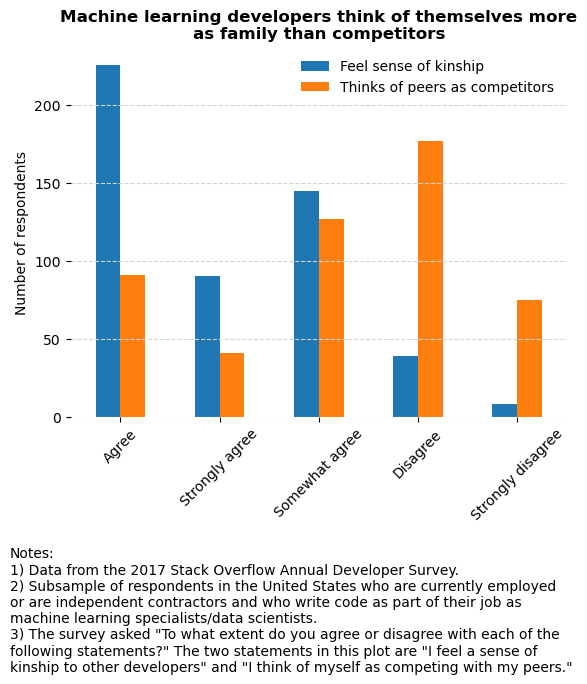

In [10]:
# Preparing data for plot

keys = ['Agree', 'Strongly agree', 'Somewhat agree', 'Disagree', 'Strongly disagree']

for col_name in ['KinshipDevelopers', 'CompetePeers']:
    # Change order of categories for a clearer plot
    so_2017[col_name] = pd.Categorical(so_2017[col_name], keys)

kinship_counts = so_2017['KinshipDevelopers'].value_counts().sort_index(ascending=True).tolist()
competition_counts = so_2017['CompetePeers'].value_counts().sort_index(ascending=True).tolist()

# Plot
# Unstacked bar plots: https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

plot_data = pd.DataFrame({
    'Feel sense of kinship': kinship_counts,
    'Thinks of peers as competitors': competition_counts
    },
    index = keys
)

ax = plot_data.plot(kind = 'bar')

title = 'Machine learning developers think of themselves more\nas family than competitors'
ax.set_ylabel("Number of respondents")
plt.legend(frameon = False)
plt.xticks(rotation = 45)
plt.figtext(0.03, -0.42, 'Notes:\n1) Data from the 2017 Stack Overflow Annual Developer Survey.\n2) Subsample of respondents in the United States who are currently employed\nor are independent contractors and who write code as part of their job as\nmachine learning specialists/data scientists.\n3) The survey asked "To what extent do you agree or disagree with each of the\nfollowing statements?" The two statements in this plot are "I feel a sense of\nkinship to other developers" and "I think of myself as competing with my peers."')

my_plt_style(ax, title, ygrid = True)

plt.savefig(plots_path + '5_17_2023.png', bbox_inches = 'tight', dpi = 120)